# Лабораторна робота №2

**Завдання:** створити інтерфейс на Streamlit для прогнозування позиції гравця NBA
на основі моделі, побудованої у першій лабораторній роботі.

In [20]:
!pip install pycaret

In [21]:

import pandas as pd
from pycaret.classification import load_model, predict_model
from pycaret.datasets import get_data
import matplotlib.pyplot as plt

In [22]:
# Завантаження моделі
model = load_model('nba_classifier_model')

Transformation Pipeline and Model Successfully Loaded


In [23]:
# Завантаження датасету
nba = get_data("nba")
nba.dropna(inplace=True)
features = nba.drop(columns=["TARGET_5Yrs"])

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [24]:
# Формування input-полів
input_data = {}
for col in features.columns:
    if nba[col].dtype == 'float64' or nba[col].dtype == 'int64':
        input_data[col] = float(nba[col].mean())
    else:
        input_data[col] = nba[col].unique()[0]

input_df = pd.DataFrame([input_data])

In [25]:
# Прогнозування
prediction = predict_model(model, data=input_df)
print(prediction.columns)
prediction[['prediction_label']]

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'prediction_label', 'prediction_score'],
      dtype='object')


,prediction_label
0,0


### Опис ознак:
- **Pos** — позиція (цільова змінна)
- **Age, G, GS, MP, FG, FGA, FG%** — статистика гри
- **3P, 3PA, 3P%** — триочкові кидки
- **2P, 2PA, 2P%** — двоочкові
- **FT, FTA, FT%** — штрафні
- **ORB, DRB, TRB** — підбирання
- **AST, STL, BLK, TOV, PF, PTS** — асисти, перехоплення тощо

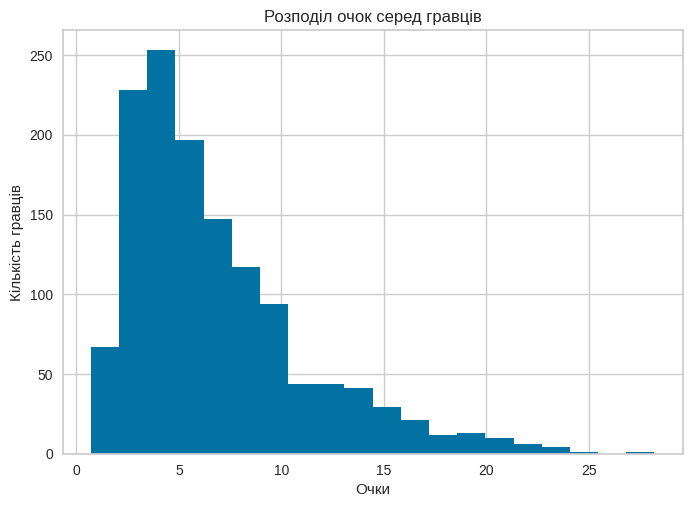

In [26]:
# Побудова гістограми
fig, ax = plt.subplots()
ax.hist(nba['PTS'], bins=20)
ax.set_title("Розподіл очок серед гравців")
ax.set_xlabel("Очки")
ax.set_ylabel("Кількість гравців")
fig.show()